<a href="https://colab.research.google.com/github/An-u-rag/computer-vision-sandbox/blob/main/object_detection_ssd_yolo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import torch
import torchvision
import cv2

In [11]:
from torchvision.models.detection.ssd import ssd300_vgg16
from PIL import Image
import numpy as np
import copy

img = Image.open("carcam.png").convert("RGB")
img = np.array(img).astype('float32')
raw = copy.deepcopy(img)
img = torch.from_numpy(img)
img = torch.permute(img, (2, 0 ,1))
img = torch.unsqueeze(img, dim = 0)
img = img.to("cuda")


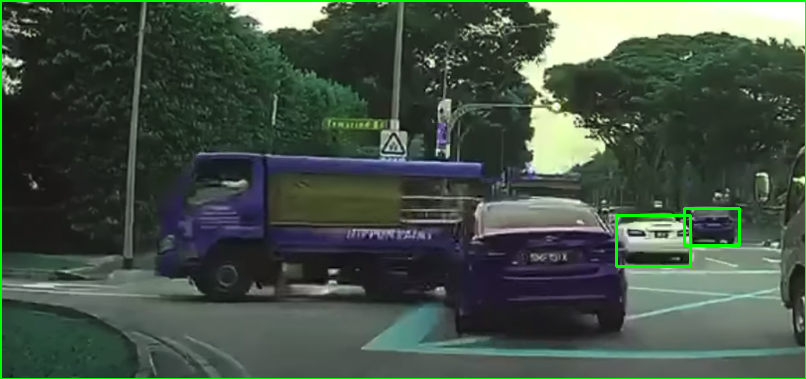

In [12]:
model = ssd300_vgg16(weights=torchvision.models.detection.SSD300_VGG16_Weights.COCO_V1).to("cuda")
model.eval()
pred = model(img)

boxes = pred[0]['boxes']
labels = pred[0]['labels']
scores = pred[0]['scores']

for box, label, score in zip(boxes, labels, scores):
  if score > 0.5:
    x1, y1, x2, y2 = box
    x1 = int(x1.item())
    x2 = int(x2.item())
    y1 = int(y1.item())
    y2 = int(y2.item())

    # Draw box
    cv2.rectangle(raw, (x1, y1), (x2, y2), (0, 255, 0), 2)

cv2_imshow(raw)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


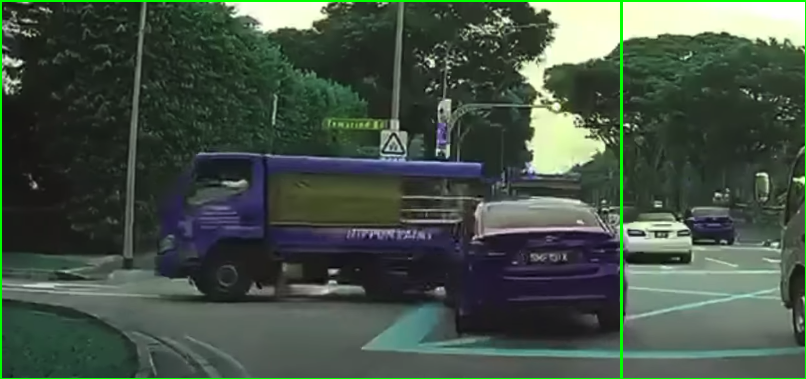

In [7]:
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from google.colab.patches import cv2_imshow
model2 = fasterrcnn_resnet50_fpn(pretrained = True).to("cuda")
model2.eval()
pred2 = model2(img)

boxes = pred2[0]['boxes']
labels = pred2[0]['labels']
scores = pred2[0]['scores']

for box, label, score in zip(boxes, labels, scores):
  if score > 0.5:
    x1, y1, x2, y2 = box
    x1 = int(x1.item())
    x2 = int(x2.item())
    y1 = int(y1.item())
    y2 = int(y2.item())

    # Draw box
    cv2.rectangle(raw, (x1, y1), (x2, y2), (0, 255, 0), 2)

cv2_imshow(raw)



